In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#--------------- keras imports -------------------#
import keras
from keras.layers import Input, Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using Theano backend.


In [2]:
from keras.models import Model

In [3]:
import cv2

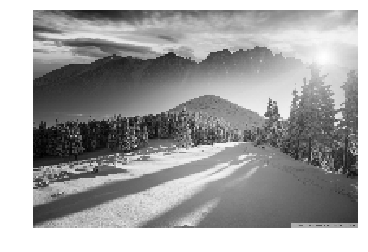

In [29]:
im = cv2.imread('./im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
im = cv2.resize(im,(200, 134))

plt.figure(0)
plt.axis("off")
plt.imshow(im, cmap='gray')
plt.show()

In [33]:
kernel = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]], dtype='float32')
print kernel

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


In [36]:
def hadamard_prod(mat_01, mat_02):
    m, n = mat_01.shape
    p, q = mat_02.shape
    
    if not (m==p and n==q):
        return 0
    return mat_01*mat_02

def convolution2D(image, kernel):
        m, n = image.shape
        p, q = kernel.shape 
        out = np.zeros((m-p+1, n-q+1))
        for ix in range(out.shape[0]):
             for iy in range(out.shape[1]):
                    im_patch = image[ix:ix+p, iy:iy+q]
                    prod = hadamard_prod(im_patch, kernel)
                    val = prod.sum()
                    if val < 0:
                        val = 0.0
                    elif val > 255:
                        val = 255.0
                    out[ix, iy] = val

        return out


(132, 198)


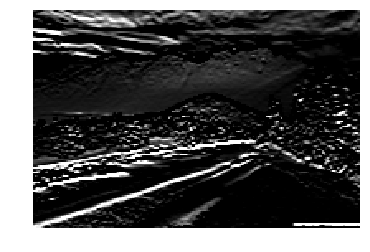

In [38]:
c = convolution2D(im, kernel)
print c.shape
plt.figure(0)
plt.axis("off")
plt.imshow(c, cmap='gray')
plt.show()